# Wind and Temperature Analysis

In [4]:
# import library and data 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
 
benin = pd.read_csv('../../data/benin-malanville.csv')
sierraleone = pd.read_csv('../../data/sierraleone-bumbuna.csv')
togo = pd.read_csv('../../data/togo-dapaong_qc.csv')

### Wind Analysis 

In [2]:
def plot_wind_rose(data, title):
    # Create bins for wind direction
    bins = np.arange(0, 360, 30)
    wind_direction_bins = np.digitize(data['WD'], bins)
    
    # Calculate mean wind speed for each bin
    wind_speed_means = [data['WS'][wind_direction_bins == i].mean() for i in range(1, len(bins))]
    
    # Plot wind rose
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    bars = ax.bar(np.deg2rad(bins[:-1]), wind_speed_means, width=np.deg2rad(30), edgecolor='white')
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    plt.title(title)
    plt.show()

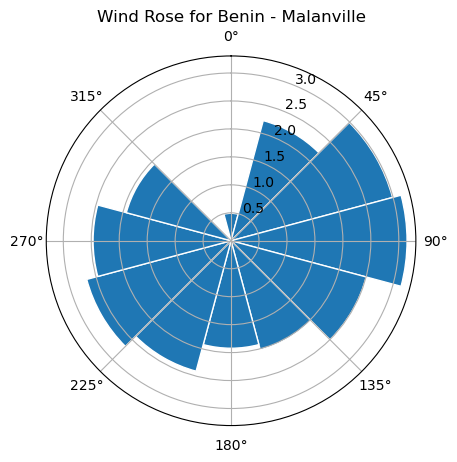

In [3]:
# plot wind rose for benin 
plot_wind_rose(benin, 'Wind Rose for Benin - Malanville')


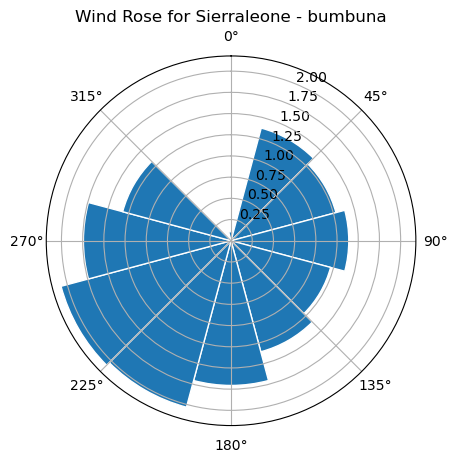

In [4]:
# plot wind rose for Sierraleone 
plot_wind_rose(sierraleone, 'Wind Rose for Sierraleone - bumbuna')

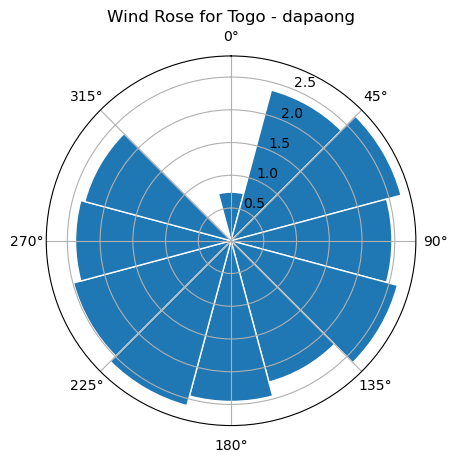

In [5]:
# plot wind rose for togo 
plot_wind_rose(togo, 'Wind Rose for Togo - dapaong')

### Temperature Analysis 

#### steps to follow for temperature analysis 
- create a method which will analyze temperature and relative humidity by reciving the dataframe.
- create a new column for average temperture by using `TModA` and `TModB`. 
- plot a graph by using time to temperature for axis 1 and time to humidity for axis 2.
- finally use this function for 3 cities.

In [1]:
def create_avg_temp(data):
    data['Temperature'] = (data['TModA'] + data['TModB']) / 2

def analyze_temp_and_rh(data):
    # Create a new column for average temperature
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Temperature (C)', color=color)
    ax1.plot(data['Timestamp'], data['Temperature'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Relative Humidity (%)', color=color)
    ax2.plot(data['Timestamp'], data['RH'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Temperature and Relative Humidity Over Time')
    plt.show()

In [5]:

# Analyze temperature and relative humidity for benin
create_avg_temp(benin)
# analyze_temp_and_rh(togo)


In [7]:
analyze_temp_and_rh(benin)